In [22]:
import cv2
import numpy as np
import winsound

frameWidth=640
frameHeight=480
cap=cv2.VideoCapture(0)
cap.set(3,frameWidth)
cap.set(4,frameHeight)


# cap.set(10,150) #setting brightnes
red=False          ########COLOR TRACKING DONE
while True:         
    
    img=cv2.imread('frame_6.jpg')
    img=cv2.resize(img,(368,640))
#     roi = cv2.selectROI(img)
#     print(roi)
    img2=img[21:31,254:258]
    img2=cv2.resize(img2,(320,184))
    cv2.imshow("cropped",img2)
    imgHSV=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    lower=np.array([0,179,171])
    upper=np.array([255,255,255])
    mask=cv2.inRange(imgHSV,lower,upper)
    mask=cv2.resize(mask,(368,640))
    cv2.imshow("mask",mask)
    result_img=cv2.bitwise_and(img,img,mask=mask)
    cv2.imshow("result image",result_img)
    
    R =img2[125,150,2] #BGR format
    if R>=200:
        winsound.Beep(700,400)
#         winsound.PlaySound('alert.WAV', winsound.SND_ASYNC)
        red=True
#         print(red)
        
    k=cv2.waitKey(1) &0xFF
    if k==27:
        break
        
    cv2.imshow('final_img',result_img)
cap.release()
cv2.destroyAllWindows()

In [12]:
img2.shape


(184, 320, 3)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.imshow(result_img[:,:,])

result_img=cv2.cvtColor(img2,cv2.COLOR_HSV2BGR)
# plt.imshow(result_img[0:150,140:230,2])
# plt.imshow(result_img[30:50,140:230,2])

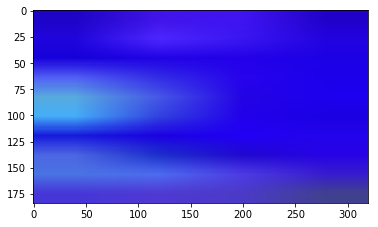

In [14]:
plt.imshow(img2)

In [15]:
img2[125,150]

array([ 29,  10, 224], dtype=uint8)

In [18]:
B,G,R = img2[125,150]

In [1]:
R

NameError: name 'R' is not defined

In [1]:
import torch

In [3]:
pip install pandas

  Attempting uninstall: numpy
    Found existing installation: numpy 1.15.1
    Uninstalling numpy-1.15.1:
      Successfully uninstalled numpy-1.15.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mkl-random 1.0.1 requires cython, which is not installed.
tensorflow 1.10.0 requires numpy<=1.14.5,>=1.13.3, but you have numpy 1.19.5 which is incompatible.
tensorflow 1.10.0 requires setuptools<=39.1.0, but you have setuptools 58.0.4 which is incompatible.


In [4]:
import cv2
import torch
import numpy as np

# Load the pre-trained YOLOv5 model
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True).eval().to('cuda')

model = torch.load('best.pt')
model.eval().to('cuda')

# Read input frames from a camera
cap = cv2.VideoCapture(0)

# Loop over each frame
while True:
    # Read a frame
    ret, frame = cap.read()

    # Preprocess the frame
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = torch.from_numpy(frame).to('cuda').float() / 255.0
    frame = frame.permute(2, 0, 1).unsqueeze(0)

    # Run the model on the frame
    outputs = model(frame)

    # Extract the predictions
    boxes = outputs[0]['boxes'].cpu().detach().numpy()
    scores = outputs[0]['scores'].cpu().detach().numpy()
    classes = outputs[0]['classes'].cpu().detach().numpy().astype(np.int32)

    # Perform non-maximum suppression
    keep = cv2.dnn.NMSBoxes(boxes, scores, conf_threshold=0.5, nms_threshold=0.5)

    # Visualize the results
    for i in keep:
        box = boxes[i]
        x, y, w, h = box
        x1, y1, x2, y2 = x - w / 2, y - h / 2, x + w / 2, y + h / 2
        c = classes[i]
       


ImportError: this version of pandas is incompatible with numpy < 1.15.4
your numpy version is 1.15.1.
Please upgrade numpy to >= 1.15.4 to use this pandas version